### **Imports and Setup**

In [29]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

current_dir = os.getcwd()

db_path = os.path.abspath(os.path.join(current_dir, '..', 'data', 'app.db'))

print(f"Looking for database at: {db_path}")

if not os.path.exists(db_path):
    db_path = os.path.join(current_dir, 'data', 'app.db')
    print(f"Not found. Trying root path: {db_path}")

if not os.path.exists(db_path):
    print("ERROR: File still not found! Check your folder structure.")
else:
    try:
        conn = sqlite3.connect(db_path)
        print("Success! Database connected.")
    except Exception as e:
        print(f"Connection Error: {e}")

Looking for database at: /Users/kemelmerey/Desktop/Data collection and preparation/final/DCP_final_project/data/app.db
Success! Database connected.


### **Inspect Raw Event Data**

In [30]:
query_events = "SELECT * FROM events ORDER BY id DESC LIMIT 10"
df_events = pd.read_sql_query(query_events, conn)

print("Last 10 Recorded Events (Cleaned Data)")
display(df_events)

Last 10 Recorded Events (Cleaned Data)


,id,ingestion_timestamp,forecast_intensity,actual_intensity,index_intensity,source,created_at
0,10,2025-12-17T16:44:10.208540,139,135,moderate,carbonintensity.org.uk,2025-12-17 16:44:25
1,9,2025-12-17T16:43:39.360713,139,135,moderate,carbonintensity.org.uk,2025-12-17 16:44:25
2,8,2025-12-17T16:43:08.529812,139,135,moderate,carbonintensity.org.uk,2025-12-17 16:44:25
3,7,2025-12-17T16:42:37.583684,139,135,moderate,carbonintensity.org.uk,2025-12-17 16:44:25
4,6,2025-12-17T16:42:06.484277,139,135,moderate,carbonintensity.org.uk,2025-12-17 16:44:25
5,5,2025-12-17T16:41:35.327244,139,135,moderate,carbonintensity.org.uk,2025-12-17 16:44:25
6,4,2025-12-17T16:41:04.345638,139,135,moderate,carbonintensity.org.uk,2025-12-17 16:44:25
7,3,2025-12-17T16:40:33.380392,139,134,moderate,carbonintensity.org.uk,2025-12-17 16:44:25
8,2,2025-12-17T16:40:02.249700,139,134,moderate,carbonintensity.org.uk,2025-12-17 16:44:25
9,1,2025-12-17T16:39:30.967949,139,134,moderate,carbonintensity.org.uk,2025-12-17 16:44:25


### **Inspect Daily Summary Analytics**

In [31]:
query_summary = "SELECT * FROM daily_summary ORDER BY summary_date DESC, part_of_day"
df_summary = pd.read_sql_query(query_summary, conn)

print("Daily Analytics Summary")
display(df_summary)

Daily Analytics Summary


,summary_date,part_of_day,avg_forecast,avg_actual,max_intensity,min_intensity
0,2025-12-17,Afternoon,139.0,134.7,135,134


### **Visualization (Forecast vs Actual)**

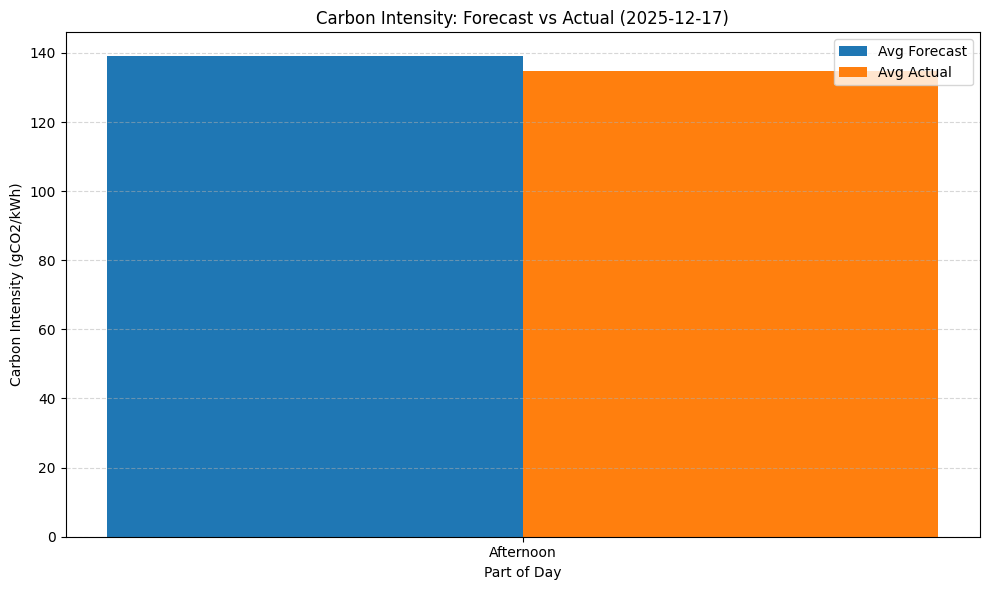

In [32]:
if not df_summary.empty:
    plt.figure(figsize=(10, 6))
    
    latest_date = df_summary['summary_date'].max()
    day_data = df_summary[df_summary['summary_date'] == latest_date]
    
    x_labels = day_data['part_of_day']
    x_axis = range(len(x_labels))
    
    plt.bar([x - 0.2 for x in x_axis], day_data['avg_forecast'], width=0.4, label='Avg Forecast', color='#1f77b4', align='center')
    plt.bar([x + 0.2 for x in x_axis], day_data['avg_actual'], width=0.4, label='Avg Actual', color='#ff7f0e', align='center')
    
    plt.xlabel('Part of Day')
    plt.ylabel('Carbon Intensity (gCO2/kWh)')
    plt.title(f"Carbon Intensity: Forecast vs Actual ({latest_date})")
    plt.xticks(x_axis, x_labels)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
else:
    print("No summary data available yet. Please run Job 3 in Airflow first.")

### **Close Connection**

In [33]:
conn.close()
print("Database connection closed.")

Database connection closed.
